<a href="https://colab.research.google.com/github/satabarto123/DenV1/blob/main/DenV1Genomics(S_Asia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Strain : DenV1**

**Completeness :** Complete Nucleotide

**Countries Considered :**                      
 Bangladesh, Brunei,Cambodia,Indonesia,Laos,Malaysia,Maldives,Myanmar,Philippines,Singapore,Sri Lanka,Thailand,Viet Nam

 **Host :** Human

 **Source Specimen :** Blood

 **Strain Count :** 897

 **Mean Length :** 10643 (10374-11195)

 **Data Source :** NCBI-Viral Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/DenV1/

'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
'sequence-southeast-asian(non-indian).fasta'
 temp_sequences.fasta


In [ ]:
file_directory='/content/drive/MyDrive/DenV1/sequence-southeast-asian(non-indian).fasta'

In [ ]:
pip install biopython


In [ ]:
!pip install --upgrade biopython

from Bio import SeqIO
try:
    from Bio.SeqUtils import gc_fraction
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    from Bio.SeqUtils import GC

import pandas as pd
import os
import glob

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd
import os
import glob
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1
file_directory='/content/drive/MyDrive/DenV1/sequence-southeast-asian(non-indian).fasta'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
'sequence-southeast-asian(non-indian).fasta'
 temp_sequences.fasta


#**GC3 Content : ID wise**

In [ ]:
def gc3_content(sequence):
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0
    return (gc3_count / total_codons) * 100

gc3_values = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    gc3_values.append({'ID': record.id, 'GC3': gc3_value})

df = pd.DataFrame(gc3_values)
print(df)

             ID        GC3
0    KF921942.1  45.517640
1    KU509263.1  43.030654
2    KU509260.1  43.133854
3    JF937597.1  50.390286
4    JF937603.1  43.080035
..          ...        ...
891  JQ287660.1  45.819398
892  JQ287661.1  46.025570
893  JQ287662.1  45.899835
894  JQ287667.1  46.387521
895  JQ287663.1  45.644599

[896 rows x 2 columns]


In [ ]:
df.describe()

,GC3
count,896.000000
mean,45.419460
std,1.712605
min,42.820218
25%,43.655674
50%,45.579568
75%,45.776031
max,50.674706


# **GC3 - ENc Dataframe**

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd
import os
import glob
from google.colab import drive
from Bio.SeqUtils import gc_fraction
!pip install biopython

!pip install --upgrade biopython

try:
    def GC(sequence):
        return 100 * gc_fraction(sequence, ambiguous="ignore")
except ImportError:
    pass

drive.mount('/content/drive')
!ls /content/drive/MyDrive/DenV1
file_directory='/content/drive/MyDrive/DenV1/sequence-southeast-asian(non-indian).fasta'
def gc3_content(sequence):
    """Calculates the GC content of the third position of codons in a sequence."""
    gc3_count = 0
    total_codons = 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            total_codons += 1
            if codon[2] in ['G', 'C']:
                gc3_count += 1
    if total_codons == 0:
        return 0
    return (gc3_count / total_codons) * 100

def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0

    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc

results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value})

df = pd.DataFrame(results)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'EEG & ZWT based Emotion Detection'
 marked_sequences.fasta
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1)(mains).mtsx'
'maximum_likelihood_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700)(attempt 1).mtsx'
'minimum_evolution_bootstrap_consensus_tree(btstrap 700).mtsx'
'neighbour_joining_bootstrap_consensus_tree(attempt1 bootstrap 700).mtsx'
 neighbour_joining_bootstrap_consensus_tree.mtsx
'sequence-southeast-asian(non-indian).fasta'
 temp_sequences.fasta
             ID        GC3          ENc
0    KF921942.1  45.517640  2025.729235
1    KU509263.1  43.030654  2335.559593
2    KU509260.1  43.133854  2390.748548
3    JF937597.1  50.390286  2222.445677
4    JF937603.1  43.080035  2348.326895
..          ...        ...          ...
891  JQ287660.1  45.819398  2081.999188
892  JQ

In [ ]:
df

,ID,GC3,ENc
0,OK605755.1,43.543879,2391.066302
1,JF459993.1,43.432085,2397.600124
2,FJ639674.1,43.266798,2363.755871
3,GQ199830.1,45.860230,2082.559930
4,GQ199831.1,45.860230,2081.511672
...,...,...,...
892,OM281595.1,43.543879,2423.822917
893,OM281596.1,43.627725,2355.034987
894,OM281597.1,43.599776,2362.632567
895,OM281598.1,43.599776,2399.765411


In [ ]:

import pandas as pd
def calculate_enc(sequence):
    """Calculates the effective number of codons (ENc) for a given sequence."""
    codon_counts = {}
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1

    num_codons = len(codon_counts)
    if num_codons <= 1:
        return 0
    f_values = [count / sum(codon_counts.values()) for count in codon_counts.values()]
    f_squared_sum = sum(f ** 2 for f in f_values)

    enc = 2 + 9 / (f_squared_sum) + 1 / (sum(f ** 3 for f in f_values))
    return enc


results = []
for record in SeqIO.parse(file_directory, "fasta"):
    gc3_value = gc3_content(str(record.seq))
    enc_value = calculate_enc(str(record.seq))
    length = len(record.seq)
    results.append({'ID': record.id, 'GC3': gc3_value, 'ENc': enc_value, 'Length': length})

df = pd.DataFrame(results)
print(df)

df

             ID        GC3          ENc  Length
0    KF921942.1  45.517640  2025.729235   10374
1    KU509263.1  43.030654  2335.559593   10375
2    KU509260.1  43.133854  2390.748548   10378
3    JF937597.1  50.390286  2222.445677   10379
4    JF937603.1  43.080035  2348.326895   10383
..          ...        ...          ...     ...
891  JQ287660.1  45.819398  2081.999188   10766
892  JQ287661.1  46.025570  2072.816467   10794
893  JQ287662.1  45.899835  2108.606689   10904
894  JQ287667.1  46.387521  2135.849448   10962
895  JQ287663.1  45.644599  2127.347352   11195

[896 rows x 4 columns]


,ID,GC3,ENc,Length
0,KF921942.1,45.517640,2025.729235,10374
1,KU509263.1,43.030654,2335.559593,10375
2,KU509260.1,43.133854,2390.748548,10378
3,JF937597.1,50.390286,2222.445677,10379
4,JF937603.1,43.080035,2348.326895,10383
...,...,...,...,...
891,JQ287660.1,45.819398,2081.999188,10766
892,JQ287661.1,46.025570,2072.816467,10794
893,JQ287662.1,45.899835,2108.606689,10904
894,JQ287667.1,46.387521,2135.849448,10962


# **GC3 VS ENc**

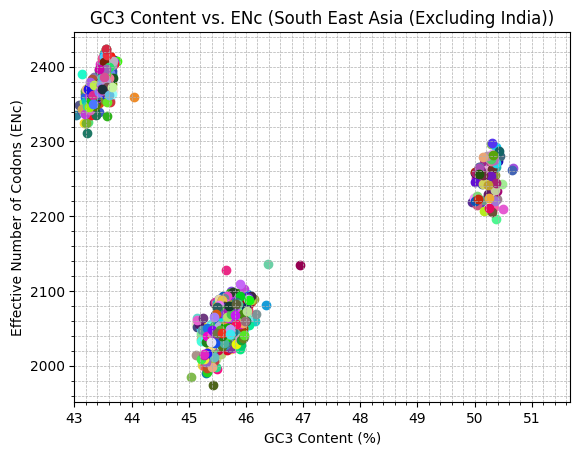

In [ ]:
import matplotlib.pyplot as plt
import random

colors = [
    "#" + "".join([random.choice("0123456789ABCDEF") for j in range(6)])
    for i in range(len(df))
]

fig, ax = plt.subplots()

for i in range(len(df)):
    ax.scatter(df['GC3'][i], df['ENc'][i], color=colors[i], label=df['ID'][i])

ax.set_xlabel('GC3 Content (%)')
ax.set_ylabel('Effective Number of Codons (ENc)')
ax.set_title('GC3 Content vs. ENc (South East Asia (Excluding India))')

ax.set_xlim(43, df['GC3'].max() + 1)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()


plt.show()


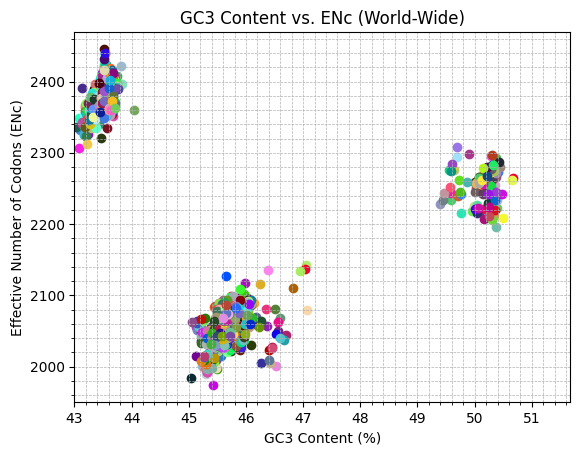

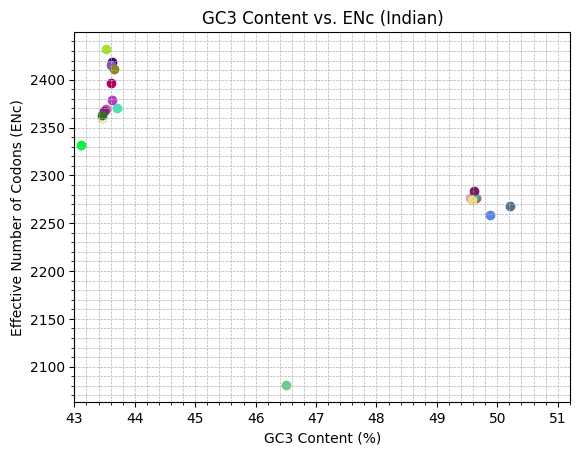

#**RSU of Strains**

In [ ]:

from collections import Counter

def calculate_rscu(sequence):
    codon_counts = Counter()
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i + 3]
        if len(codon) == 3:
            codon_counts[codon] += 1

    rscu_values = {}
    for codon, count in codon_counts.items():
        synonymous_codons = [c for c in codon_counts if c[0:2] == codon[0:2]]
        num_synonymous = len(synonymous_codons)
        if num_synonymous > 1:
            expected_frequency = sum(codon_counts[c] for c in synonymous_codons) / num_synonymous
            rscu_values[codon] = count / expected_frequency
        else:
            rscu_values[codon] = 1.0
    return rscu_values

rscu_results = []
for record in SeqIO.parse(file_directory, "fasta"):
    rscu_values = calculate_rscu(str(record.seq))
    rscu_results.append({'ID': record.id, 'RSCU': rscu_values})

for result in rscu_results:
    print(f"Sequence ID: {result['ID']}")
    for codon, rscu in result['RSCU'].items():
        print(f"  {codon}: {rscu:.2f}")

highly_expressed = []
lowly_expressed = []
for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if rscu > 1.2:
            highly_expressed.append((result['ID'], codon, rscu))
        elif rscu < 0.8:
            lowly_expressed.append((result['ID'], codon, rscu))

print("\nHighly Expressed Codons (RSCU > 1.2):")
for seq_id, codon, rscu in highly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")

print("\nLowly Expressed Codons (RSCU < 0.8):")
for seq_id, codon, rscu in lowly_expressed:
    print(f"  {seq_id}: {codon} ({rscu:.2f})")


Streaming output truncated to the last 5000 lines.
  EU677154.1: ACG (0.47)
  EU677154.1: CCG (0.38)
  EU677154.1: GCG (0.32)
  EU677154.1: ACT (0.62)
  EU677154.1: GGC (0.50)
  EU677154.1: CCC (0.68)
  EU677154.1: ATT (0.68)
  EU677154.1: ATC (0.63)
  EU677154.1: GGT (0.50)
  EU677154.1: CTC (0.57)
  EU677154.1: CCT (0.73)
  EU677154.1: CAT (0.72)
  EU677154.1: GGG (0.71)
  EU677154.1: GTC (0.70)
  EU677154.1: TGC (0.80)
  EU677154.1: GAT (0.73)
  EU677154.1: TGT (0.75)
  EU677154.1: GTA (0.72)
  EU677154.1: TGA (0.07)
  EU677154.1: TAG (0.14)
  EU677155.1: TCG (0.26)
  EU677155.1: AAT (0.62)
  EU677155.1: CTT (0.67)
  EU677155.1: TAA (0.24)
  EU677155.1: AGT (0.51)
  EU677155.1: TTA (0.77)
  EU677155.1: AGC (0.66)
  EU677155.1: ACG (0.47)
  EU677155.1: CCG (0.38)
  EU677155.1: GCG (0.32)
  EU677155.1: ACT (0.62)
  EU677155.1: GGC (0.51)
  EU677155.1: CCC (0.65)
  EU677155.1: ATT (0.66)
  EU677155.1: ATC (0.66)
  EU677155.1: GGT (0.48)
  EU677155.1: CTC (0.57)
  EU677155.1: CCT (0.76)

#**RSCU1 (MAX) VS RSCU2(MIN)**

In [ ]:
import itertools

all_codons = ["".join(c) for c in itertools.product("ACGT", repeat=3)]
rscu_df = pd.DataFrame(index=all_codons, columns=['RSCU1', 'RSCU2'])


for result in rscu_results:
    for codon, rscu in result['RSCU'].items():
        if codon in rscu_df.index:
            rscu_df.loc[codon, 'RSCU1'] = max(rscu_df.loc[codon, 'RSCU1'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU1']) else rscu
            rscu_df.loc[codon, 'RSCU2'] = min(rscu_df.loc[codon, 'RSCU2'], rscu) if pd.notna(rscu_df.loc[codon, 'RSCU2']) else rscu

rscu_df.fillna(0, inplace=True)
print(rscu_df)


        RSCU1     RSCU2
AAA  1.771261  1.151515
AAC      0.98  0.695652
AAG  1.522727  0.738609
AAT  1.124378  0.422857
ACA  1.921875  1.161905
..        ...       ...
TGT  0.901099  0.650407
TTA  0.832487  0.412698
TTC  1.258883  0.835821
TTG       1.6       0.8
TTT  1.719008  0.763819

[64 rows x 2 columns]


#**GC-GC3**

In [ ]:
import pandas as pd
gc_values = []
gc3_values = []

for record in SeqIO.parse(file_directory, "fasta"):
    sequence = str(record.seq)
    gc_values.append({'ID': record.id, 'GC': GC(sequence)})
    gc3_values.append({'ID': record.id, 'GC3': gc3_content(sequence)})

df_gc = pd.DataFrame(gc_values)
df_gc3 = pd.DataFrame(gc3_values)

df_combined = pd.merge(df_gc, df_gc3, on='ID')

print(df_combined)


             ID         GC        GC3
0    KF921942.1  46.288799  45.517640
1    KU509263.1  46.245783  43.030654
2    KU509260.1  46.357680  43.133854
3    JF937597.1  46.439927  50.390286
4    JF937603.1  46.316094  43.080035
..          ...        ...        ...
891  JQ287660.1  46.656140  45.819398
892  JQ287661.1  46.701871  46.025570
893  JQ287662.1  46.725972  45.899835
894  JQ287667.1  46.989600  46.387521
895  JQ287663.1  46.949531  45.644599

[896 rows x 3 columns]


In [ ]:
rscu_df


,RSCU1,RSCU2
AAA,1.771261,1.151515
AAC,0.98,0.695652
AAG,1.522727,0.738609
AAT,1.124378,0.422857
ACA,1.921875,1.161905
...,...,...
TGT,0.901099,0.650407
TTA,0.832487,0.412698
TTC,1.258883,0.835821
TTG,1.6,0.8


#**CAI (Codon Adaptive Index)**

In [ ]:
import pandas as pd
import numpy as np

def calculate_cai(reference_rscu):

  cai_values = []
  for codon, rscu in reference_rscu.items():
    amino_acid = codon[:2]
    max_rscu = reference_rscu[reference_rscu.index.str.startswith(amino_acid)].max()
    relative_adaptiveness = rscu / max_rscu
    cai = np.exp(np.log(relative_adaptiveness))
    cai_values.append({'codon': codon, 'CAI': cai})

  return pd.DataFrame(cai_values)

cai_df1 = calculate_cai(rscu_df['RSCU1'])
cai_df2 = calculate_cai(rscu_df['RSCU2'])

print("CAI using RSCU1:")
print(cai_df1)
print("\nCAI using RSCU2:")
print(cai_df2)


CAI using RSCU1:
   codon       CAI
0    AAA  1.000000
1    AAC  0.553278
2    AAG  0.859685
3    AAT  0.634790
4    ACA  1.000000
..   ...       ...
59   TGT  0.368023
60   TTA  0.484283
61   TTC  0.732331
62   TTG  0.930769
63   TTT  1.000000

[64 rows x 2 columns]

CAI using RSCU2:
   codon       CAI
0    AAA  1.000000
1    AAC  0.604119
2    AAG  0.641424
3    AAT  0.367218
4    ACA  1.000000
..   ...       ...
59   TGT  0.596892
60   TTA  0.493764
61   TTC  1.000000
62   TTG  0.957143
63   TTT  0.913855

[64 rows x 2 columns]


In [ ]:
df.describe()


,GC3,ENc,Length
count,896.000000,896.000000,896.000000
mean,45.419460,2161.437536,10643.834821
std,1.712605,144.054881,101.843431
min,42.820218,1974.192387,10374.000000
25%,43.655674,2053.627777,10671.750000
50%,45.579568,2079.378223,10690.000000
75%,45.776031,2344.242400,10690.000000
max,50.674706,2423.822917,11195.000000


#**Correlation b/a Length and GC3 and Enc**




In [ ]:
import pandas as pd
import numpy as np

def calculate_correlations(df):

  df['GC3'] = pd.to_numeric(df['GC3'], errors='coerce')
  df['ENc'] = pd.to_numeric(df['ENc'], errors='coerce')



  df = df.dropna(subset=['GC3', 'ENc', 'Length'])

  if not pd.api.types.is_numeric_dtype(df['GC3']) or not pd.api.types.is_numeric_dtype(df['ENc']):
    raise ValueError("GC3 or ENc column is not numeric")

  correlation_gc3 = df['Length'].corr(df['GC3'])
  correlation_enc = df['Length'].corr(df['ENc'])

  return correlation_gc3, correlation_enc

correlation_gc3, correlation_enc = calculate_correlations(df)
print(f"Correlation between  Length and GC3: {correlation_gc3:.2f}")
print(f"Correlation between  Length and ENc: {correlation_enc:.2f}")



Correlation between  Length and GC3: -0.11
Correlation between  Length and ENc: 0.09


#**T-Series Test**

In [ ]:

from scipy import stats

t_statistic_enc, p_value_enc = stats.ttest_rel(df['Length'], df['ENc'])

print(f"T-test for Length and ENc:")
print(f"  T-statistic: {t_statistic_enc:.2f}")
print(f"  P-value: {p_value_enc:.3f}")

t_statistic_gc3, p_value_gc3 = stats.ttest_rel(df['Length'], df['GC3'])

print("\nT-test for Length and GC3:")
print(f"  T-statistic: {t_statistic_gc3:.2f}")
print(f"  P-value: {p_value_gc3:.3f}")



T-test for Length and ENc:
  T-statistic: 1506.25
  P-value: 0.000

T-test for Length and GC3:
  T-statistic: 3109.06
  P-value: 0.000


#**PCA (Principal Component 1' and 'Principal Component 2')**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Length', 'GC3', 'ENc']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['ID'] = df['ID']

print(pca_df)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

"""
Explanation:

 1. Feature Selection: ‘Length’, ‘GC3’, ‘ENc’ are taken from your DataFrame since these are the only numerical features you have calculated and they seem to be relevant for analysis.

 2. Standardization: StandardScaler is used for the standardization of the features. It is important for PCA because it is scale sensitive meaning that the scales of the features will affect the outcomes. Standardization normalizes all the features in as much as they are scaled in a way that will give them a mean value of 0 and standard deviation of 1.

 3. PCA: Because the number of genes is large, we perform PCA two and extract the variation that are most important.

 4. PCA DataFrame: They make a DataFrame ’pca_df’ where they insert PC1 and PC2, and insert sequence IDs for better orientation.

 5. Explained Variance Ratio: The ‘explained_variance_ratio_’ attribute of the PCA object gives out the proportion of the overall variance in the data which is explained by the principal component.

 6. Plot: Using Cytoscape, we display the results by using a scatter plot in which PC1 is plotted against PC2.

 Interpretation:

 - In general, each of the principal components is a weighted sum of the initial variables.
 - Thus, representing extra dimension of assortment which is illustrated by constructing the link between variables, PC1 reflects the maximal dispersion in the field of certain indicators.
 - PC2 on the other hand captures the second highest variance, this is perpendicular to PC2.
 - The ‘explained variance ratio’ gives an indication of the amount of information that is retained by each of the principal components.
 - On the plot the author proves how the sequences get grouped or spread depending on the PC values.

 Values in the PCA DataFrame:Values in the PCA DataFrame:

 - 'Principal Component 1' and 'Principal Component 2': These are the co-ordinates of each sequence in the reduced dimensional space formed by the principal components of the first morphological data scenario.
 - 'ID': The is the sequence identifier corresponding to each of the rows.

 Only if the first components of the principal axes have low values and correspond similar values on the ‘score’ column of the principal components, the new values in the columns of the principal component have to be obtained by projecting the original standardized feature values onto the principal component axes. These values indicate the extent of contribution that each sequence has got towards the variation that is explained by each of the principal components.

"""


     Principal Component 1  Principal Component 2          ID
0                 1.487854              -2.286184  KF921942.1
1                -0.938245              -3.075990  KU509263.1
2                -1.163492              -3.126721  KU509260.1
3                 2.479195              -1.995724  JF937597.1
4                -1.002426              -3.016503  JF937603.1
..                     ...                    ...         ...
891               0.157378               1.318500  JQ287660.1
892               0.196614               1.619185  JQ287661.1
893              -0.352820               2.573311  JQ287662.1
894              -0.462961               3.127124  JQ287667.1
895              -1.422344               5.231321  JQ287663.1

[896 rows x 3 columns]

Explained Variance Ratio:
[0.47741372 0.31827964]


"\nExplanation:\n\n 1. Feature Selection: ‘Length’, ‘GC3’, ‘ENc’ are taken from your DataFrame since these are the only numerical features you have calculated and they seem to be relevant for analysis.\n\n 2. Standardization: StandardScaler is used for the standardization of the features. It is important for PCA because it is scale sensitive meaning that the scales of the features will affect the outcomes. Standardization normalizes all the features in as much as they are scaled in a way that will give them a mean value of 0 and standard deviation of 1.\n\n 3. PCA: Because the number of genes is large, we perform PCA two and extract the variation that are most important.\n\n 4. PCA DataFrame: They make a DataFrame ’pca_df’ where they insert PC1 and PC2, and insert sequence IDs for better orientation.\n\n 5. Explained Variance Ratio: The ‘explained_variance_ratio_’ attribute of the PCA object gives out the proportion of the overall variance in the data which is explained by the principa

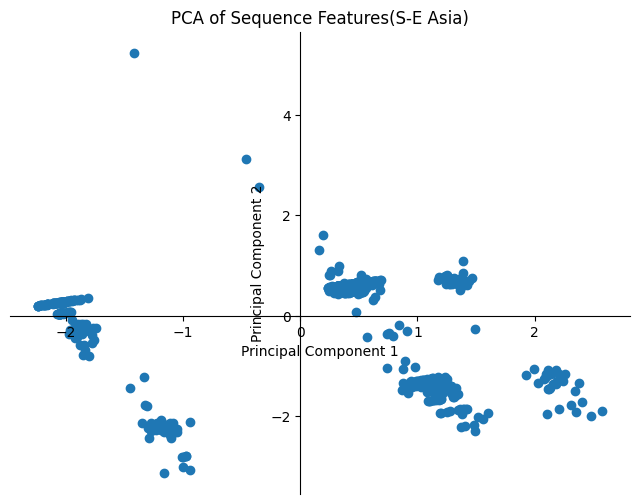

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sequence Features(S-E Asia)')

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

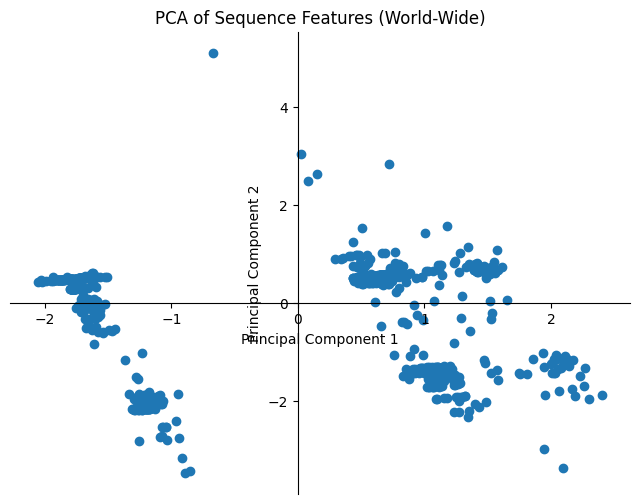

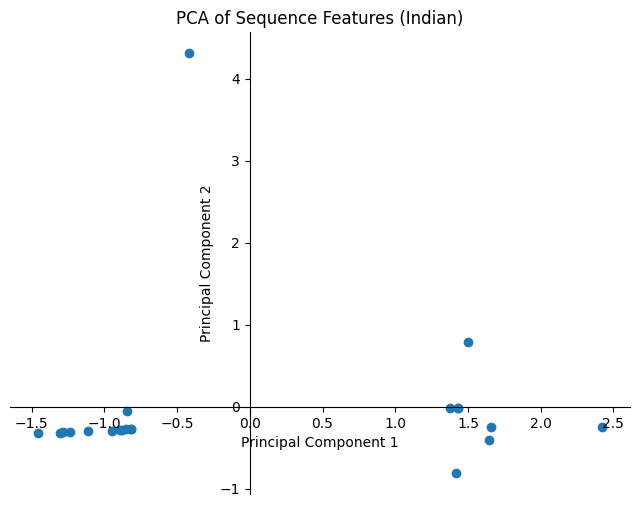